In [39]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [40]:
import numpy as np
import pandas as pd

In [41]:
import datetime as dt

In [42]:
import sqlite3 as sq

# Reflect Tables into SQLAlchemy ORM

In [43]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [44]:
# Create engine 
engine = create_engine("sqlite:////Users/brianroberts1/Documents/GitHub/sqlalchemy_challenge/Resources_hawaii.sqlite")
print(engine)

Engine(sqlite:////Users/brianroberts1/Documents/GitHub/sqlalchemy_challenge/Resources_hawaii.sqlite)


In [45]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [50]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [47]:
# Save references to each table
measurements = Base.classes.measurement
stations = Base.classes.station

In [48]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [51]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(measurements.date).order_by(measurements.date.desc()).first()
print(f"Last Date: {last_date[0]}");

# Subtract one year to retrieve one year prior to final data point
last_year_date = '2016-08-23'
print(f"One year prior to Last Date: {last_year_date}");

Last Date: 2017-08-23
One year prior to Last Date: 2016-08-23


In [53]:
# Perform a query to retrieve the date and precipitation scores
measurement_data = session.query(measurements.date, measurements.prcp).\
                filter(measurements.date >= last_year_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
measurement_df = pd.DataFrame(measurement_data)
measurement_df.set_index('date', inplace=True)
measurement_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [54]:
# Sort the dataframe by date
measurement_df = measurement_df.sort_index()

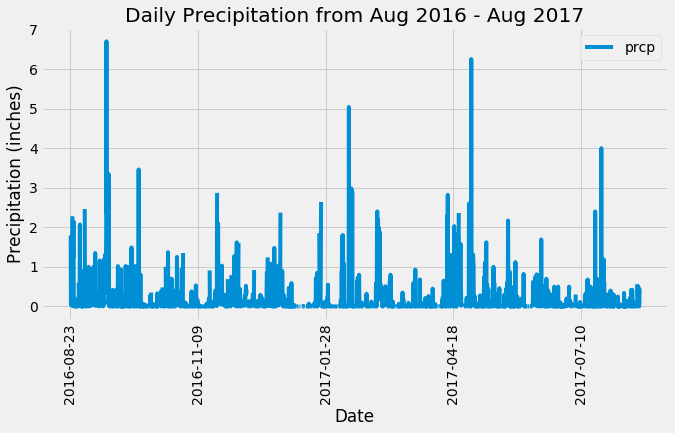

In [55]:
# Use Pandas Plotting with Matplotlib to plot the data
measurement_df.plot(figsize=(10,5),rot=(90))
plt.title('Daily Precipitation from Aug 2016 - Aug 2017')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)');

In [56]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurement_df.describe()

In [72]:
# Design a query to show how many stations are available in this dataset?
station_data = session.query(func.count(stations.id)).all()
print(f'There are {station_data} stations available.');

There are [(9,)] stations available.


In [82]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_activity = session.query(measurements.station, func.count(measurements.station)).\
                   group_by(measurements.station).order_by(func.count(measurements.station).\
                   desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [84]:
# Using the station iowfrom the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
low = session.query(func.min(measurements.tobs)).\
      filter(measurements.station == 'USC00519281').all()
high = session.query(func.max(measurements.tobs)).\
       filter(measurements.station == 'USC00519281').all()
avg = session.query(func.avg(measurements.tobs)).\
      filter(measurements.station == 'USC00519281').all()
print(f'The most active statin has a min temp. {low}, a max temp. {high}, and an avg temp of {avg} degrees farenheit.')


The most active statin has a min temp. [(54.0,)], a max temp. [(85.0,)], and an avg temp of [(71.66378066378067,)] degrees farenheit.


In [85]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station...
# ...and plot the results as a histogram
most_active = session.query(measurements.date, measurements.tobs).\
                filter(measurements.station == 'USC00519281').\
                filter(measurements.date > last_year_date).all()
most_active

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
